<a href="https://colab.research.google.com/github/zeeshan-ahmed-ai-tech/Machine-Learning/blob/main/catboost_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.1 MB/s eta 0:00:00


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.5 MB/s eta 0:00:00


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.3 MB/s eta 0:00:00


Discrete features are:... Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

 Categorical features are: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure

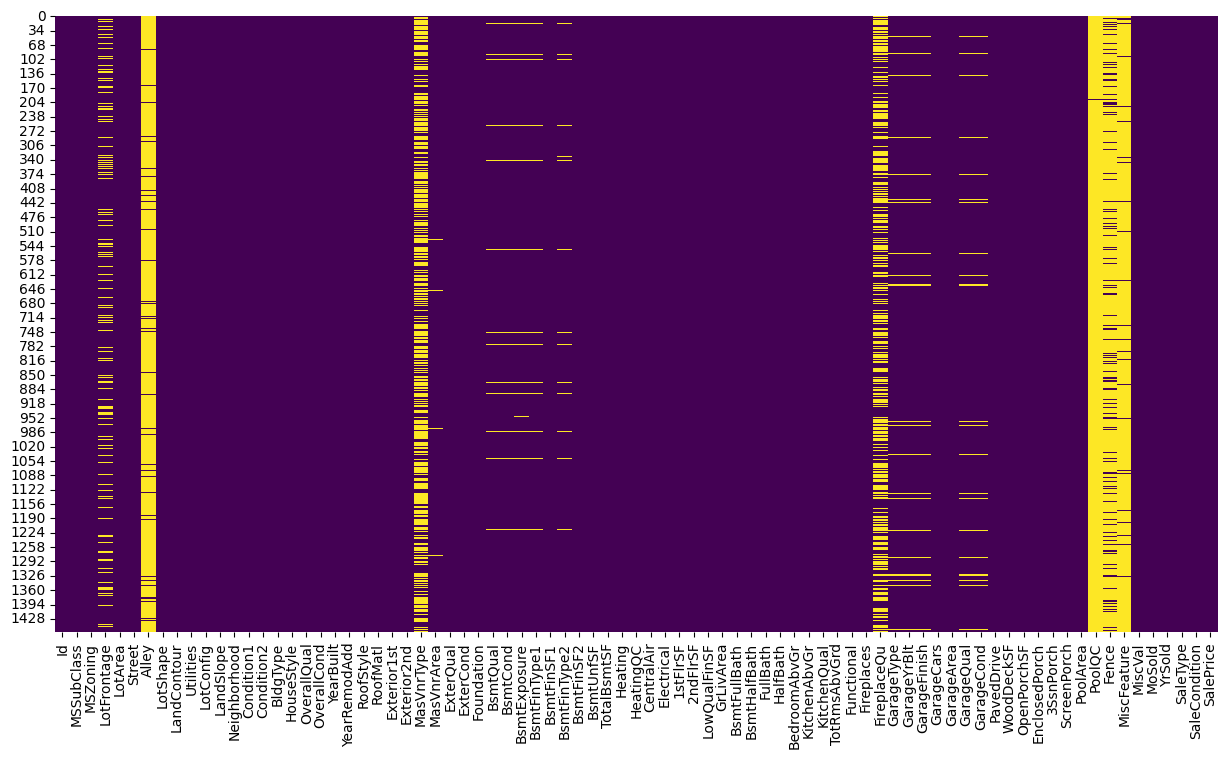

RMSE Baseline Scores: [0.11907685 0.15519105 0.14326749 0.12755579 0.14129373]
RMSE Baseline Score: 0.13727698180802467
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4091
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 78
[LightGBM] [Info] Start training from score 180717.091610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4108
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 80
[LightGBM] [Info] Start training from score 180407.575342
[LightGBM] [Info] Auto-choosing row-wise multi-threading, th

[I 2024-09-11 14:02:43,056] A new study created in memory with name: no-name-1cd35c59-4613-4489-9e36-d7d40a295634


RMSE CatBoost Scores: [0.10698668 0.13620737 0.12261933 0.10912587 0.12043992]
RMSE CatBoost Score: 0.11907583355188119


[I 2024-09-11 14:02:44,224] Trial 0 finished with value: 0.14384219622188057 and parameters: {'iterations': 2720, 'learning_rate': 0.18956315225035672, 'l2_leaf_reg': 8.13299417175338e-08, 'border_count': 93}. Best is trial 0 with value: 0.14384219622188057.
[I 2024-09-11 14:02:44,957] Trial 1 finished with value: 0.1424541274790793 and parameters: {'iterations': 524, 'learning_rate': 0.25140329712722553, 'l2_leaf_reg': 1.1992601510218577e-05, 'border_count': 37}. Best is trial 1 with value: 0.1424541274790793.
[I 2024-09-11 14:02:46,213] Trial 2 finished with value: 0.13127868812681748 and parameters: {'iterations': 2325, 'learning_rate': 0.19386540063681124, 'l2_leaf_reg': 0.8900075562157868, 'border_count': 227}. Best is trial 2 with value: 0.13127868812681748.
[I 2024-09-11 14:02:47,034] Trial 3 finished with value: 0.14186566168564912 and parameters: {'iterations': 2264, 'learning_rate': 0.23626198182305008, 'l2_leaf_reg': 2.1032876330840282e-05, 'border_count': 73}. Best is trial

Best Hyperparameters: {'iterations': 2723, 'learning_rate': 0.03619780807609187, 'l2_leaf_reg': 1.1310116920418787e-06, 'border_count': 94}


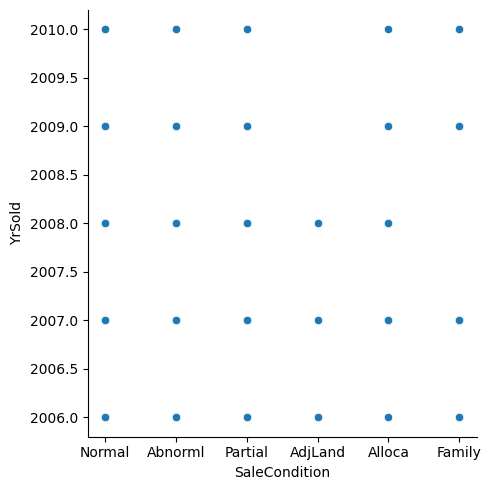

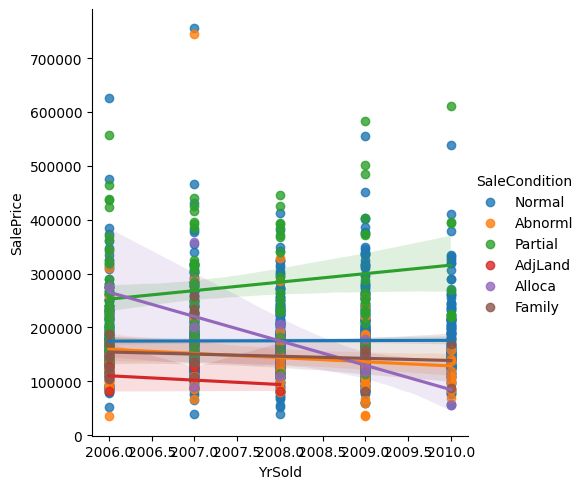

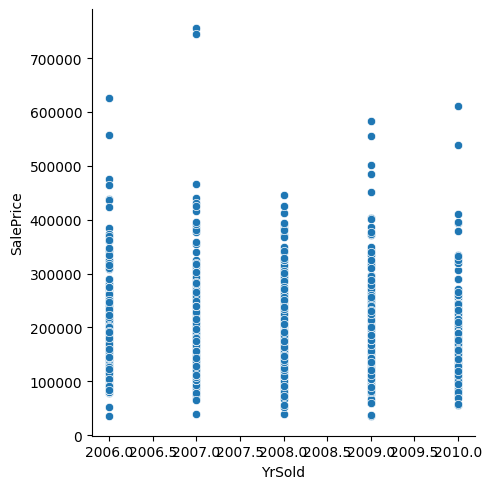

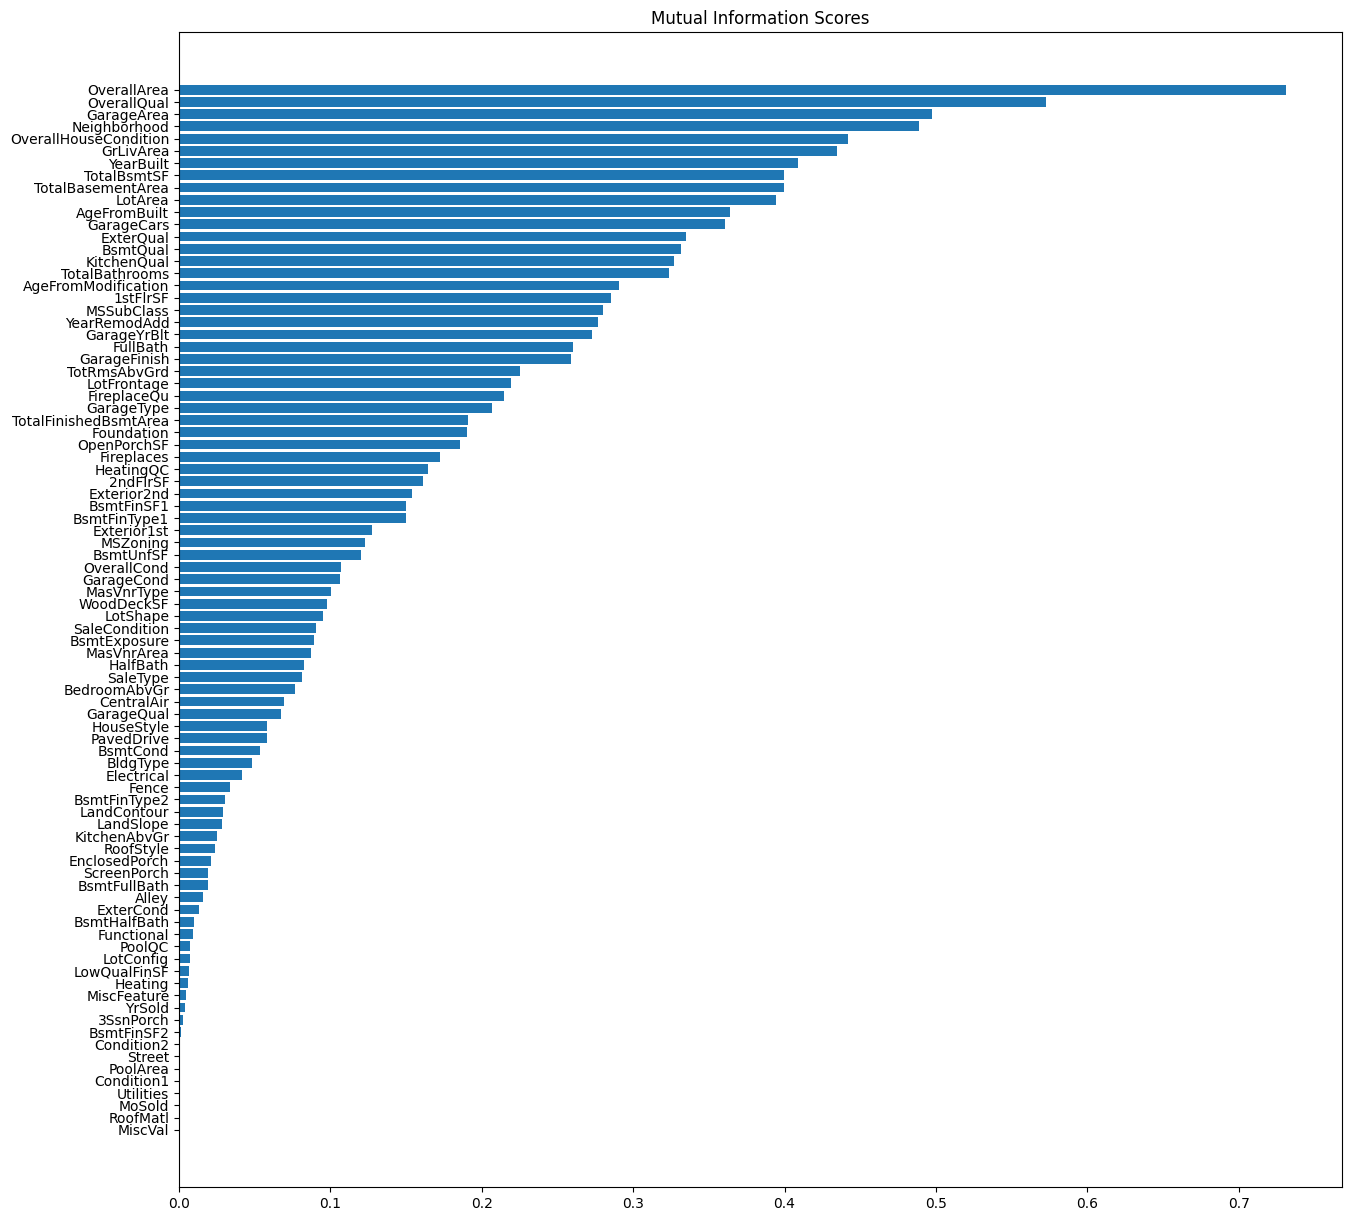

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, LabelBinarizer
from category_encoders import TargetEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import optuna
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

train_df = pd.read_csv("train.csv")
train_df.head()

train_df.columns

discrete_features = train_df.select_dtypes(include=['int', 'float'])
categorical_features = train_df.select_dtypes(include=['object'])
print(f'Discrete features are:... {discrete_features.columns}\n\n Categorical features are: {categorical_features.columns}')

columns_with_null_values = train_df.columns[train_df.isnull().any()]
columns_with_null_values

discrete_features_with_nulls = [col for col in columns_with_null_values if pd.api.types.is_float_dtype(train_df[col])]
categorical_features_with_nulls = [col for col in columns_with_null_values if pd.api.types.is_object_dtype(train_df[col])]
print(f"Discrete features that contain null values are: {discrete_features_with_nulls}")
print(f"Categorical features that contain null values are: {categorical_features_with_nulls}")

plt.figure(figsize=(15,8))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.show()

sns.relplot(x="SaleCondition", y="YrSold", data=train_df);

sns.lmplot(x="YrSold", y="SalePrice", hue="SaleCondition", data=train_df);

sns.relplot(x="YrSold", y="SalePrice", data=train_df);

# Add a value of 0 whenever there is a null value in the MasVnrType column
train_df.loc[train_df['MasVnrType'].isna(), 'MasVnrArea'] = 0

# Calculate the average LotFrontage within each MSZoning group
average_lot_frontage = train_df.groupby('MSZoning')['LotFrontage'].transform('mean')

# Fill null values in LotFrontage with the group-wise averages
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(average_lot_frontage)

# Add a value of No whenever there is a null value in the BsmtExposure column
condition = (train_df['BsmtCond'].notna()) & (train_df['BsmtExposure'].isna())
train_df.loc[condition, 'BsmtExposure'] = 'No'

# Give a value of FuseF to null row in Electrical because based on the SalePrice, it is a fair amount for a FuseF
train_df.loc[train_df['Electrical'].isna(), 'Electrical'] = 'FuseF'

train_df['BsmtQual'].fillna('None', inplace=True)
train_df['BsmtCond'].fillna('None', inplace=True)
train_df['BsmtExposure'].fillna('None', inplace=True)
train_df['BsmtFinType1'].fillna('None', inplace=True)
train_df['BsmtFinType2'].fillna('None', inplace=True)
train_df['FireplaceQu'].fillna('None', inplace=True)
train_df['GarageFinish'].fillna('None', inplace=True)
train_df['GarageQual'].fillna('None', inplace=True)
train_df['GarageCond'].fillna('None', inplace=True)
train_df['PoolQC'].fillna('None', inplace=True)
train_df['ExterQual'].fillna('None', inplace=True)
train_df['Fence'].fillna('None', inplace=True)
train_df['HeatingQC'].fillna('None', inplace=True)
train_df['GarageYrBlt'].fillna(train_df['YearBuilt'], inplace=True)

bsmt_qual_ordered_categories = [['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']]
ordinal_encoder = OrdinalEncoder(categories=bsmt_qual_ordered_categories)
train_df['BsmtQual'] = ordinal_encoder.fit_transform(train_df[['BsmtQual']])
train_df['BsmtCond'] = ordinal_encoder.fit_transform(train_df[['BsmtCond']])

bsmt_exposure_ordered_categories = [['None','No', 'Mn', 'Av', 'Gd']]
ordinal_encoder = OrdinalEncoder(categories=bsmt_exposure_ordered_categories)
train_df['BsmtExposure'] = ordinal_encoder.fit_transform(train_df[['BsmtExposure']])

bsmt_fin_type_1_categories = [['None','Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']]
ordinal_encoder = OrdinalEncoder(categories=bsmt_fin_type_1_categories)
train_df['BsmtFinType1'] = ordinal_encoder.fit_transform(train_df[['BsmtFinType1']])
train_df['BsmtFinType2'] = ordinal_encoder.fit_transform(train_df[['BsmtFinType2']])

electrical_categories = [['FuseP', 'FuseF', 'Mix', 'FuseA', 'SBrkr']]
ordinal_encoder = OrdinalEncoder(categories=electrical_categories)
train_df['Electrical'] = ordinal_encoder.fit_transform(train_df[['Electrical']])

fireplace_quality_categories = [['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']]
ordinal_encoder = OrdinalEncoder(categories=fireplace_quality_categories)
train_df['FireplaceQu'] = ordinal_encoder.fit_transform(train_df[['FireplaceQu']])
train_df['HeatingQC'] = ordinal_encoder.fit_transform(train_df[['HeatingQC']])

garage_finish_categories = [['None', 'Unf', 'RFn', 'Fin']]
ordinal_encoder = OrdinalEncoder(categories=garage_finish_categories)
train_df['GarageFinish'] = ordinal_encoder.fit_transform(train_df[['GarageFinish']])

garage_quality_categories = [['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']]
ordinal_encoder = OrdinalEncoder(categories=garage_quality_categories)
train_df['GarageQual'] = ordinal_encoder.fit_transform(train_df[['GarageQual']])
train_df['GarageCond'] = ordinal_encoder.fit_transform(train_df[['GarageCond']])
train_df['KitchenQual'] = ordinal_encoder.fit_transform(train_df[['KitchenQual']])

pool_quality_categories = [['None', 'Fa', 'TA', 'Gd', 'Ex']]
ordinal_encoder = OrdinalEncoder(categories=pool_quality_categories)
train_df['PoolQC'] = ordinal_encoder.fit_transform(train_df[['PoolQC']])

fence_quality_categories = [['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']]
ordinal_encoder = OrdinalEncoder(categories=fence_quality_categories)
train_df['Fence'] = ordinal_encoder.fit_transform(train_df[['Fence']])

lb = LabelBinarizer()
train_df['Street'] = lb.fit_transform(train_df['Street'])
train_df['CentralAir'] = lb.fit_transform(train_df['CentralAir'])

standard_scaler = StandardScaler()
train_df['OverallArea'] = (
    train_df['GrLivArea'] + train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['LowQualFinSF'] +
    train_df['TotalBsmtSF'] + train_df['BsmtFinSF1'] + train_df['BsmtFinSF2'] + train_df['BsmtUnfSF'] +
    train_df['GarageArea'] +
    train_df['WoodDeckSF'] + train_df['OpenPorchSF'] + train_df['EnclosedPorch'] +
    train_df['3SsnPorch'] + train_df['ScreenPorch'] +
    train_df['PoolArea'] +
    train_df['MiscVal']
)
train_df['OverallArea'] = standard_scaler.fit_transform(train_df[['OverallArea']])

target_encoder = TargetEncoder()
for colname in train_df.select_dtypes(include=["object"]):
    train_df[colname] = target_encoder.fit_transform(train_df[[colname]],
                                                     train_df['OverallQual'])

train_df.head()

## Feature Engineering

train_df['AgeFromBuilt'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['AgeFromModification'] = train_df['YrSold'] - train_df['YearRemodAdd']

train_df['OverallHouseCondition'] = train_df['OverallCond'] * train_df['OverallQual']
train_df['TotalBasementArea'] = train_df['TotalBsmtSF'] + train_df['BsmtFinSF1'] + train_df['BsmtFinSF2'] + train_df['BsmtUnfSF']
train_df['TotalBathrooms'] = train_df['FullBath'] + 0.5 * train_df['HalfBath']
train_df['TotalFinishedBsmtArea'] = train_df['BsmtFinSF1'] + train_df['BsmtFinSF2']

## Features and Target definition

y = train_df['SalePrice']
X = train_df.drop(columns=['Id', 'SalePrice'])

## MI Score

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=True)
    return mi_scores

discrete_features_X = X.dtypes == int
mi_scores = make_mi_scores(X, y, discrete_features_X)
mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(15, 15))
plot_mi_scores(mi_scores)

## Scorer

def root_mean_squared_error(targets, predictions):
    return np.sqrt(((np.log(predictions) - np.log(targets)) ** 2).mean())

scorer = make_scorer(score_func=root_mean_squared_error)

## Baseline model

baseline = RandomForestRegressor()
baseline_scores = cross_val_score(
    baseline, X, y, cv=5, scoring=scorer
)
baseline_score = baseline_scores.mean()

print(f"RMSE Baseline Scores: {baseline_scores}")
print(f"RMSE Baseline Score: {baseline_score}")

## LGBM

lgbm = LGBMRegressor()
lgbm_scores = cross_val_score(
    lgbm, X, y, cv=5, scoring=scorer
)
lgbm_score = lgbm_scores.mean()

print(f"RMSE LGBM Scores: {lgbm_scores}")
print(f"RMSE LGBM Score: {lgbm_score}")

## CatBoostRegressor

cat = CatBoostRegressor(verbose=0)
cat_scores = cross_val_score(
    cat, X, y, cv=5, scoring=scorer
)
cat_score = cat_scores.mean()

print(f"RMSE CatBoost Scores: {cat_scores}")
print(f"RMSE CatBoost Score: {cat_score}")

## Hyperparameter Tuning

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 500, 4000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-9, 10, log=True),
        'border_count': trial.suggest_int('border_count', 32, 255),
    }

    model = CatBoostRegressor(**params, random_state=42, silent=True)

    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], early_stopping_rounds=100, verbose=False)

    y_pred = model.predict(X_valid)

    mse = root_mean_squared_error(y_valid, y_pred)

    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
print("Best Hyperparameters:", best_params)

## Build model

model = CatBoostRegressor(silent=True, random_state=42)
model.fit(X, y)

## Predict on test

test_df = pd.read_csv("test.csv")
test_df.head()

test_df.loc[train_df['MasVnrType'].isna(), 'MasVnrArea'] = 0

average_lot_frontage = test_df.groupby('MSZoning')['LotFrontage'].transform('mean')

test_df['LotFrontage'] = test_df['LotFrontage'].fillna(average_lot_frontage)

condition = (test_df['BsmtCond'].notna()) & (test_df['BsmtExposure'].isna())
test_df.loc[condition, 'BsmtExposure'] = 'No'

test_df['BsmtQual'].fillna('None', inplace=True)
test_df['BsmtCond'].fillna('None', inplace=True)
test_df['BsmtExposure'].fillna('None', inplace=True)
test_df['BsmtFinType1'].fillna('None', inplace=True)
test_df['BsmtFinType2'].fillna('None', inplace=True)
test_df['FireplaceQu'].fillna('None', inplace=True)
test_df['GarageFinish'].fillna('None', inplace=True)
test_df['GarageQual'].fillna('None', inplace=True)
test_df['GarageCond'].fillna('None', inplace=True)
test_df['PoolQC'].fillna('None', inplace=True)
test_df['HeatingQC'].fillna('None', inplace=True)
test_df['KitchenQual'].fillna('None', inplace=True)
test_df['Fence'].fillna('None', inplace=True)
test_df['Utilities'].fillna('None', inplace=True)
test_df['BsmtExposure'].fillna('None', inplace=True)
test_df['GarageYrBlt'].fillna(train_df['YearBuilt'], inplace=True)

bsmt_qual_ordered_categories = [['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']]
ordinal_encoder = OrdinalEncoder(categories=bsmt_qual_ordered_categories)
test_df['BsmtQual'] = ordinal_encoder.fit_transform(test_df[['BsmtQual']])
test_df['BsmtCond'] = ordinal_encoder.fit_transform(test_df[['BsmtCond']])

bsmt_exposure_ordered_categories = [['None', 'No', 'Mn', 'Av', 'Gd']]
ordinal_encoder = OrdinalEncoder(categories=bsmt_exposure_ordered_categories)
test_df['BsmtExposure'] = ordinal_encoder.fit_transform(test_df[['BsmtExposure']])

bsmt_fin_type_1_categories = [['None','Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']]
ordinal_encoder = OrdinalEncoder(categories=bsmt_fin_type_1_categories)
test_df['BsmtFinType1'] = ordinal_encoder.fit_transform(test_df[['BsmtFinType1']])
test_df['BsmtFinType2'] = ordinal_encoder.fit_transform(test_df[['BsmtFinType2']])

electrical_categories = [['FuseP', 'FuseF', 'Mix', 'FuseA', 'SBrkr']]
ordinal_encoder = OrdinalEncoder(categories=electrical_categories)
test_df['Electrical'] = ordinal_encoder.fit_transform(test_df[['Electrical']])

fireplace_quality_categories = [['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']]
ordinal_encoder = OrdinalEncoder(categories=fireplace_quality_categories)
test_df['FireplaceQu'] = ordinal_encoder.fit_transform(test_df[['FireplaceQu']])
test_df['HeatingQC'] = ordinal_encoder.fit_transform(test_df[['HeatingQC']])

garage_finish_categories = [['None', 'Unf', 'RFn', 'Fin']]
ordinal_encoder = OrdinalEncoder(categories=garage_finish_categories)
test_df['GarageFinish'] = ordinal_encoder.fit_transform(test_df[['GarageFinish']])

garage_quality_categories = [['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']]
ordinal_encoder = OrdinalEncoder(categories=garage_quality_categories)
test_df['GarageQual'] = ordinal_encoder.fit_transform(test_df[['GarageQual']])
test_df['GarageCond'] = ordinal_encoder.fit_transform(test_df[['GarageCond']])
test_df['KitchenQual'] = ordinal_encoder.fit_transform(test_df[['KitchenQual']])

pool_quality_categories = [['None', 'Fa', 'TA', 'Gd', 'Ex']]
ordinal_encoder = OrdinalEncoder(categories=pool_quality_categories)
test_df['PoolQC'] = ordinal_encoder.fit_transform(test_df[['PoolQC']])

fence_quality_categories = [['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']]
ordinal_encoder = OrdinalEncoder(categories=fence_quality_categories)
test_df['Fence'] = ordinal_encoder.fit_transform(test_df[['Fence']])

lb = LabelBinarizer()
test_df['Street'] = lb.fit_transform(test_df['Street'])
test_df['CentralAir'] = lb.fit_transform(test_df['CentralAir'])

target_encoder = TargetEncoder()
for colname in test_df.select_dtypes(include=["object"]):
    test_df[colname] = target_encoder.fit_transform(test_df[[colname]], test_df['OverallQual'])

test_df['AgeFromBuilt'] = test_df['YrSold'] - test_df['YearBuilt']
test_df['AgeFromModification'] = test_df['YrSold'] - test_df['YearRemodAdd']
test_df['OverallArea'] = (
    test_df['GrLivArea'] + test_df['1stFlrSF'] + test_df['2ndFlrSF'] + test_df['LowQualFinSF'] +
    test_df['TotalBsmtSF'] + test_df['BsmtFinSF1'] + test_df['BsmtFinSF2'] + test_df['BsmtUnfSF'] +
    test_df['GarageArea'] +
    test_df['WoodDeckSF'] + test_df['OpenPorchSF'] + test_df['EnclosedPorch'] +
    test_df['3SsnPorch'] + test_df['ScreenPorch'] +
    test_df['PoolArea'] +
    test_df['MiscVal']
)
test_df['OverallArea'] = standard_scaler.fit_transform(test_df[['OverallArea']])
test_df['OverallHouseCondition'] = test_df['OverallCond'] * test_df['OverallQual']
test_df['TotalBasementArea'] = test_df['TotalBsmtSF'] + test_df['BsmtFinSF1'] + test_df['BsmtFinSF2'] + test_df['BsmtUnfSF']
test_df['TotalBathrooms'] = test_df['FullBath'] + 0.5 * test_df['HalfBath']
test_df['TotalFinishedBsmtArea'] = test_df['BsmtFinSF1'] + test_df['BsmtFinSF2']

test_df = test_df.drop(columns=['Id'])
test_df.head()

predicts = model.predict(test_df)

## Submission

submission = pd.read_csv("sample_submission.csv")
submission['SalePrice'] = predicts
submission.to_csv('submission.csv', index=False)




In [ ]:
## Print fold accuracy and final accuracy score

print("Fold Accuracy Scores:")
print(f"Baseline Model: {baseline_scores}")
print(f"LGBM Model: {lgbm_scores}")
print(f"CatBoost Model: {cat_scores}")

print("\nFinal Accuracy Score:")
print(f"Baseline Model: {baseline_score}")
print(f"LGBM Model: {lgbm_score}")
print(f"CatBoost Model: {cat_score}")